In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = plt.imread('comic.jpg')

In [3]:
graydata = np.mean(data, axis = 2).astype(np.float64)

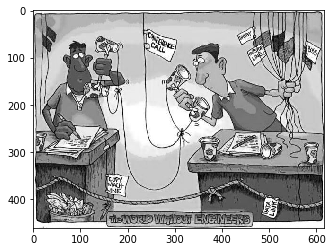

In [4]:
plt.imshow(graydata,cmap = 'gray')

In [5]:
def gaussblur(size = 3, sigma = 1):
    X = np.empty((size,size))
    mu = np.round(np.array([size/2,size/2]))
    for i in range(size):
        for j in range(size):
            pt = np.array([i+1,j+1])
            dist = np.sqrt((pt - mu)@(pt - mu).T)
            X[i,j] = (1/np.sqrt(2*np.pi*(sigma**2)))*np.exp(-(dist**2)/(2*sigma**2))
    return X
def padder(I,padrows = 2, padcols = 2):
    paddedcols = np.hstack((np.zeros((I.shape[0],padcols)), I,np.zeros((I.shape[0], padcols))))
    paddedrows = np.vstack((np.zeros((padrows,paddedcols.shape[1])),paddedcols,np.zeros((padrows,paddedcols.shape[1]))))
    return paddedrows

In [6]:
gaussfilter = gaussblur(3,2)
newergraydata = np.pad(graydata,2,'constant',constant_values = 0)
newergraydata

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 254.        , ..., 253.33333333,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        , 253.66666667, ..., 250.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [7]:
newgray = sig.correlate(newergraydata,gaussfilter,method = 'direct', mode = 'valid')

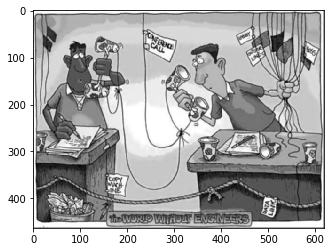

In [8]:
plt.imshow(newgray, cmap = 'gray')

In [9]:
hred = np.array([[[1,0,0],[1,0,0],[1,0,0]],[[0,0,0],[0,0,0],[0,0,0]],[[-1,0,0],[-1,0,0],[-1,0,0]]])

In [10]:
hgreen = np.array([[[0,1,0],[0,1,0],[0,1,0]],[[0,0,0],[0,0,0],[0,0,0]],[[0,-1,0],[0,-1,0],[0,-1,0]]])

In [11]:
hblue = np.array([[[0,0,1],[0,0,1],[0,0,1]],[[0,0,0],[0,0,0],[0,0,0]],[[0,0,-1],[0,0,-1],[0,0,-1]]])

In [12]:
hpurple = np.array([[[1,0,1],[1,0,1],[1,0,1]],[[0,0,0],[0,0,0],[0,0,0]],[[-1,0,-1],[-1,0,-1],[-1,0,-1]]])

In [13]:
newdata0 = padder(data[:,:,0],2,2)
newdata1 = padder(data[:,:,1],2,2)
newdata2 = padder(data[:,:,2],2,2)
newdata = np.dstack((newdata0,newdata1,newdata2))

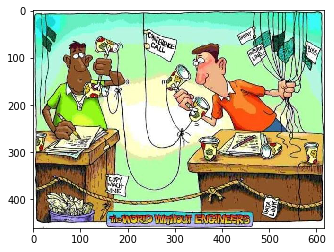

In [14]:
plt.imshow(data)

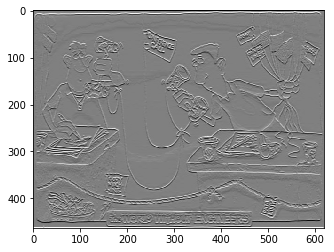

In [15]:
red = sig.correlate(newdata,hred,method = 'direct', mode = 'valid')
plt.imshow(red[:,:,0], cmap = 'gray')

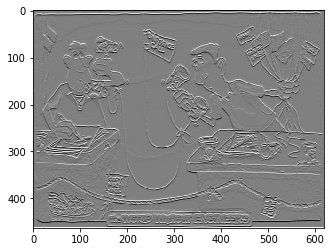

In [16]:
green = sig.correlate(newdata,hgreen,method = 'direct', mode = 'valid')
plt.imshow(green[:,:,0],cmap = 'gray')

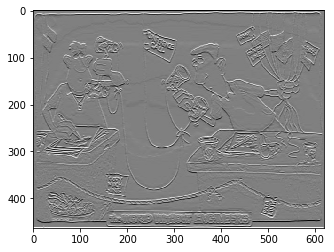

In [17]:
blue = sig.correlate(newdata,hblue,method = 'direct', mode = 'valid')
plt.imshow(blue[:,:,0], cmap = 'gray')

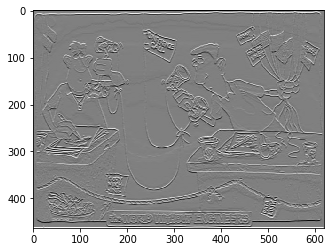

In [18]:
purple = sig.correlate(newdata,hpurple,method = 'direct', mode = 'valid')
plt.imshow(purple[:,:,0], cmap = 'gray')

In [19]:
np.sum(np.abs(red[:,:,0] - green[:,:,0]))

5793164.0